<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Avantika/Text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Session 6: Text Classification

**Learning Objectives:**
- Understand different text classification algorithms (MultinomialNB, SVM, Logistic Regression)
- Implement train/test split and cross-validation
- Evaluate models using confusion matrix, F1-score, and other metrics
- Practice multi-class text classification
- Compare model performance and select the best approach

**Dataset:** We'll work with news articles, product reviews, and custom datasets

---

## 🛠️ Setup and Imports

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Text processing
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Classification models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve
)

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download required NLTK data
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"🐍 NumPy version: {np.__version__}")
print(f"🐼 Pandas version: {pd.__version__}")

✅ All libraries imported successfully!
🐍 NumPy version: 2.0.2
🐼 Pandas version: 2.2.2


## 📊 Data Preparation

In [2]:
# Create sample datasets for text classification

def create_news_dataset():
    """Create a sample news classification dataset"""

    # Technology news
    tech_news = [
        "New AI breakthrough enables faster machine learning algorithms",
        "Tech giant releases latest smartphone with advanced camera features",
        "Cybersecurity experts warn about new malware threats",
        "Cloud computing adoption accelerates across enterprises",
        "Quantum computing research shows promising results",
        "Software update fixes critical security vulnerabilities",
        "Virtual reality technology transforms gaming industry",
        "Internet of Things devices increase smart home adoption",
        "Blockchain technology revolutionizes financial transactions",
        "Artificial intelligence improves medical diagnosis accuracy"
    ]

    # Sports news
    sports_news = [
        "Championship game ends with dramatic overtime victory",
        "Star athlete breaks long-standing world record",
        "Team trades popular player to rival franchise",
        "Olympic preparations continue despite venue challenges",
        "Coach announces retirement after successful career",
        "Rookie player shows exceptional talent in debut season",
        "Stadium renovations completed before season opener",
        "League implements new rules to improve player safety",
        "International tournament draws record viewership",
        "Injury forces veteran player to miss championship"
    ]

    # Business news
    business_news = [
        "Stock market reaches all-time high amid economic optimism",
        "Major corporation announces significant layoffs",
        "Startup secures massive funding round from investors",
        "Merger creates industry-leading company",
        "Economic indicators suggest potential recession",
        "Company reports record quarterly profits",
        "Trade negotiations impact global supply chains",
        "Central bank adjusts interest rates",
        "Retail sales decline during holiday season",
        "Cryptocurrency market experiences volatile trading"
    ]

    # Health news
    health_news = [
        "New vaccine shows high effectiveness in clinical trials",
        "Medical breakthrough offers hope for cancer patients",
        "Health officials recommend updated safety guidelines",
        "Research reveals benefits of Mediterranean diet",
        "Mental health awareness campaign launches nationwide",
        "Gene therapy treatment approved for rare disease",
        "Exercise study shows surprising cardiovascular benefits",
        "Pharmaceutical company recalls contaminated medication",
        "Telemedicine adoption grows in rural communities",
        "Sleep disorder research identifies new treatment options"
    ]

    # Combine all categories
    texts = tech_news + sports_news + business_news + health_news
    labels = (['Technology'] * len(tech_news) +
             ['Sports'] * len(sports_news) +
             ['Business'] * len(business_news) +
             ['Health'] * len(health_news))

    return pd.DataFrame({'text': texts, 'category': labels})

def create_sentiment_dataset():
    """Create a sample sentiment classification dataset"""

    positive_reviews = [
        "This product is absolutely amazing! Highly recommend it.",
        "Outstanding quality and excellent customer service.",
        "Best purchase I've made this year. Love it!",
        "Incredible value for money. Very satisfied.",
        "Perfect product, fast shipping, great experience.",
        "Exceeded my expectations in every way possible.",
        "Fantastic build quality and beautiful design.",
        "Works perfectly and arrived ahead of schedule.",
        "Brilliant product with innovative features.",
        "Absolutely delighted with this purchase."
    ]

    negative_reviews = [
        "Terrible product, completely waste of money.",
        "Poor quality and horrible customer support.",
        "Worst purchase ever. Do not recommend.",
        "Overpriced and underdelivered. Very disappointed.",
        "Product broke after one week. Awful quality.",
        "Completely useless and poorly designed.",
        "Cheap materials and terrible build quality.",
        "Doesn't work as advertised. Very frustrating.",
        "Defective product with no customer support.",
        "Regret buying this. Save your money."
    ]

    neutral_reviews = [
        "Product is okay, nothing special but works fine.",
        "Average quality for the price point.",
        "It's decent but could be better.",
        "Standard product with basic features.",
        "Neither good nor bad, just mediocre.",
        "Works as expected, no surprises.",
        "Reasonable quality for a budget option.",
        "It's fine but not outstanding.",
        "Acceptable product with room for improvement.",
        "Does the job but nothing impressive."
    ]

    texts = positive_reviews + negative_reviews + neutral_reviews
    labels = (['Positive'] * len(positive_reviews) +
             ['Negative'] * len(negative_reviews) +
             ['Neutral'] * len(neutral_reviews))

    return pd.DataFrame({'text': texts, 'sentiment': labels})

# Create datasets
news_df = create_news_dataset()
sentiment_df = create_sentiment_dataset()

print("📰 News Dataset:")
print(f"   Total samples: {len(news_df)}")
print(f"   Categories: {news_df['category'].value_counts().to_dict()}")

print("\n😊 Sentiment Dataset:")
print(f"   Total samples: {len(sentiment_df)}")
print(f"   Sentiments: {sentiment_df['sentiment'].value_counts().to_dict()}")

# Display sample data
print("\n📋 Sample News Data:")
display(news_df.head())

print("\n📋 Sample Sentiment Data:")
display(sentiment_df.head())

📰 News Dataset:
   Total samples: 40
   Categories: {'Technology': 10, 'Sports': 10, 'Business': 10, 'Health': 10}

😊 Sentiment Dataset:
   Total samples: 30
   Sentiments: {'Positive': 10, 'Negative': 10, 'Neutral': 10}

📋 Sample News Data:


,text,category
0,New AI breakthrough enables faster machine lea...,Technology
1,Tech giant releases latest smartphone with adv...,Technology
2,Cybersecurity experts warn about new malware t...,Technology
3,Cloud computing adoption accelerates across en...,Technology
4,Quantum computing research shows promising res...,Technology



📋 Sample Sentiment Data:


,text,sentiment
0,This product is absolutely amazing! Highly rec...,Positive
1,Outstanding quality and excellent customer ser...,Positive
2,Best purchase I've made this year. Love it!,Positive
3,Incredible value for money. Very satisfied.,Positive
4,"Perfect product, fast shipping, great experience.",Positive


## 🔧 Text Preprocessing Functions

In [3]:
class TextPreprocessor:
    """Comprehensive text preprocessing pipeline for classification"""

    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()

    def clean_text(self, text):
        """Basic text cleaning"""
        if pd.isna(text):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove email addresses
        text = re.sub(r'\S+@\S+', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def remove_punctuation(self, text):
        """Remove punctuation while preserving sentence structure"""
        # Keep periods, exclamation marks, question marks for sentence boundaries
        punctuation_to_remove = string.punctuation.replace('.', '').replace('!', '').replace('?', '')
        text = text.translate(str.maketrans('', '', punctuation_to_remove))
        return text

    def tokenize_and_filter(self, text, remove_stopwords=True, apply_stemming=False, apply_lemmatization=True):
        """Tokenize text and apply filtering options"""
        # Tokenize
        tokens = word_tokenize(text)

        # Filter out short tokens and numbers
        tokens = [token for token in tokens if len(token) > 2 and not token.isdigit()]

        # Remove stopwords
        if remove_stopwords:
            tokens = [token for token in tokens if token not in self.stop_words]

        # Apply stemming
        if apply_stemming:
            tokens = [self.stemmer.stem(token) for token in tokens]

        # Apply lemmatization
        if apply_lemmatization:
            tokens = [self.lemmatizer.lemmatize(token) for token in tokens]

        return tokens

    def preprocess_pipeline(self, text, remove_stopwords=True, apply_stemming=False, apply_lemmatization=True):
        """Complete preprocessing pipeline"""
        # Clean text
        text = self.clean_text(text)

        # Remove punctuation
        text = self.remove_punctuation(text)

        # Tokenize and filter
        tokens = self.tokenize_and_filter(
            text,
            remove_stopwords=remove_stopwords,
            apply_stemming=apply_stemming,
            apply_lemmatization=apply_lemmatization
        )

        # Join tokens back to text
        return ' '.join(tokens)

    def preprocess_dataframe(self, df, text_column, **kwargs):
        """Apply preprocessing to entire dataframe"""
        df_processed = df.copy()
        df_processed[f'{text_column}_processed'] = df_processed[text_column].apply(
            lambda x: self.preprocess_pipeline(x, **kwargs)
        )
        return df_processed

# Initialize preprocessor
preprocessor = TextPreprocessor()

# Test preprocessing
sample_text = "This is a GREAT product!!! I highly recommend it. Visit https://example.com for more info."
print("📝 Original text:")
print(f"   {sample_text}")

print("\n🔧 Preprocessed text:")
processed_text = preprocessor.preprocess_pipeline(sample_text)
print(f"   {processed_text}")

print("\n✅ Text preprocessing functions ready!")

📝 Original text:
   This is a GREAT product!!! I highly recommend it. Visit https://example.com for more info.

🔧 Preprocessed text:
   great product highly recommend visit info

✅ Text preprocessing functions ready!


## 🏋️ Exercise 1: Basic Text Classification Pipeline

**Objective:** Build a complete text classification pipeline using the news dataset

**Tasks:**
1. Preprocess the news dataset
2. Create TF-IDF vectors
3. Train a Multinomial Naive Bayes classifier
4. Evaluate model performance
5. Create visualizations

In [10]:
# TODO: Implement basic text classification pipeline

def basic_classification_pipeline(df, text_column, label_column, test_size=0.2, random_state=42):
    """
    Complete text classification pipeline

    Parameters:
    -----------
    df : DataFrame
        Input dataset
    text_column : str
        Name of text column
    label_column : str
        Name of label column
    test_size : float
        Proportion of test set
    random_state : int
        Random seed for reproducibility

    Returns:
    --------
    dict : Dictionary containing trained model, vectorizer, and evaluation results
    """

    # Step 1: Preprocess text data
    print("🔧 Step 1: Preprocessing text data...")
    # Your code here
    df = df.dropna(subset=[text_column, label_column])
    texts = df[text_column].astype(str)
    labels = df[label_column]

    # Step 2: Create TF-IDF vectors
    print("📊 Step 2: Creating TF-IDF vectors...")
    # Your code here
    vectorizer = TfidfVectorizer(stop_words='english')

    # Step 3: Split data into train/test sets
    print("🔀 Step 3: Splitting data...")
    # Your code here
    X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=test_size, random_state=random_state)

    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)


    # Step 4: Train Multinomial Naive Bayes classifier
    print("🤖 Step 4: Training classifier...")
    # Your code here
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)

    # Step 5: Make predictions
    print("🎯 Step 5: Making predictions...")
    # Your code here
    predictions = model.predict(X_test_tfidf)

    # Step 6: Evaluate model
    print("📈 Step 6: Evaluating model...")
    # Your code here
    acc = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)

    # Return results
    return {
        'model': model,
        'vectorizer': vectorizer,
        'accuracy': acc,
        'classification_report': report,
        'confusion_matrix': cm,
        'predictions': predictions,
        'test_labels': y_test
    }

# Test the pipeline
print("🏋️ Testing Basic Classification Pipeline")
print("=" * 50)

results = basic_classification_pipeline(news_df, 'text', 'category')

# Display results
print(f"\n📊 Model Performance:")
print(f"   Accuracy: {results['accuracy']:.3f}")

if results['classification_report']:
    print("\n📋 Classification Report:")
    print(results['classification_report'])

🏋️ Testing Basic Classification Pipeline
🔧 Step 1: Preprocessing text data...
📊 Step 2: Creating TF-IDF vectors...
🔀 Step 3: Splitting data...
🤖 Step 4: Training classifier...
🎯 Step 5: Making predictions...
📈 Step 6: Evaluating model...

📊 Model Performance:
   Accuracy: 0.125

📋 Classification Report:
              precision    recall  f1-score   support

    Business       0.00      0.00      0.00         2
      Health       0.00      0.00      0.00         1
      Sports       1.00      0.25      0.40         4
  Technology       0.00      0.00      0.00         1

    accuracy                           0.12         8
   macro avg       0.25      0.06      0.10         8
weighted avg       0.50      0.12      0.20         8



## 🏋️ Exercise 2: Model Comparison Framework

**Objective:** Compare multiple classification algorithms on the same dataset

**Tasks:**
1. Implement multiple classifiers (MultinomialNB, SVM, Logistic Regression)
2. Use cross-validation for robust evaluation
3. Compare performance metrics
4. Visualize results

🤖 Testing Model Comparison Framework
📊 Preparing data...
🔧 Preprocessing and splitting data...
🔄 Training and evaluating models...
🚀 Training and evaluating models with cross-validation...
🔍 Training Multinomial NB...
🔍 Training Logistic Regression...
🔍 Training SVM (Linear)...
🔍 Training Random Forest...
🔍 Training K-Nearest Neighbors...
📈 Creating visualizations...
📊 Visualizing model comparison...


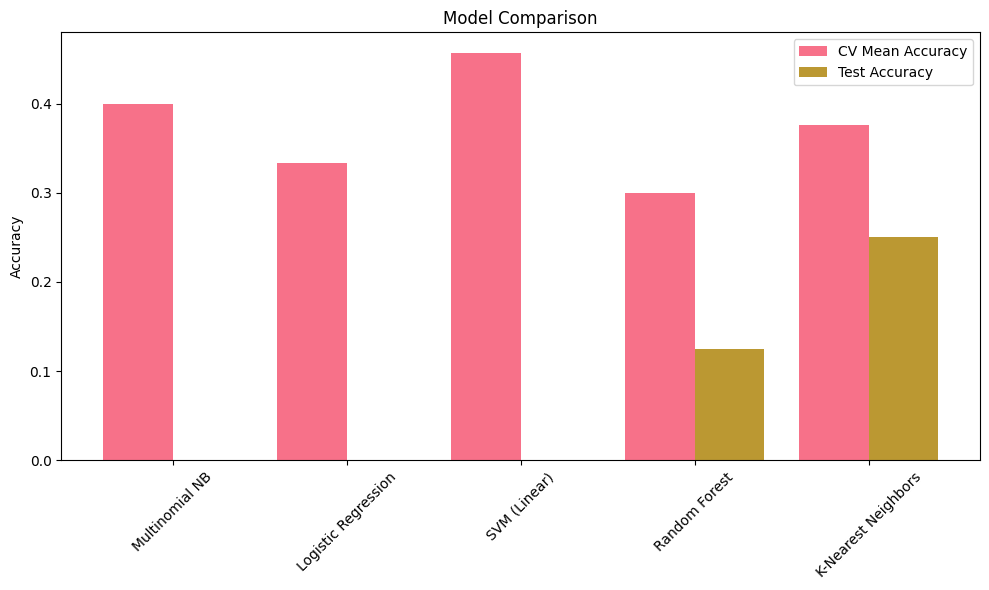


🎯 Predicting category for: 'Scientists develop revolutionary artificial intelligence algorithm for medical diagnosis'
   Predicted category: Technology


In [12]:
# TODO: Implement model comparison framework

from sklearn.pipeline import make_pipeline # Import make_pipeline

class ModelComparator:
    """Compare multiple classification models"""

    def __init__(self, random_state=42):
        self.random_state = random_state
        self.models = {
            'Multinomial NB': MultinomialNB(),
            'Logistic Regression': LogisticRegression(random_state=random_state, max_iter=1000),
            'SVM (Linear)': SVC(kernel='linear', random_state=random_state, probability=True),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=random_state),
            'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
        }
        self.results = {}
        self.fitted_pipelines = {} # Add fitted_pipelines attribute

    def prepare_data(self, df, text_column, label_column, test_size=0.2):
        """
        Prepare data for classification

        Parameters:
        -----------
        df : DataFrame
            Input dataset
        text_column : str
            Name of text column
        label_column : str
            Name of label column
        test_size : float
            Proportion of test set
        """
        # Your code here - preprocess data and create train/test splits
        print("🔧 Preprocessing and splitting data...")
        df = df.dropna(subset=[text_column, label_column])
        texts = df[text_column].astype(str)
        labels = df[label_column]

        # Initialize and fit vectorizer here
        self.vectorizer = TfidfVectorizer(stop_words='english')
        X = self.vectorizer.fit_transform(texts)


        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, labels, test_size=test_size, random_state=self.random_state
        )


    def train_and_evaluate_models(self, cv_folds=5):
        """
        Train and evaluate all models using cross-validation

        Parameters:
        -----------
        cv_folds : int
            Number of cross-validation folds
        """
        # Your code here - implement model training and evaluation
        print("🚀 Training and evaluating models with cross-validation...")
        best_score = 0

        for name, model in self.models.items():
            print(f"🔍 Training {name}...")
            # Create pipeline within the loop for consistency
            pipeline = make_pipeline(model)
            scores = cross_val_score(pipeline, self.X_train, self.y_train, cv=cv_folds)
            avg_score = np.mean(scores)

            # Fit on full training data for test evaluation
            pipeline.fit(self.X_train, self.y_train)
            preds = pipeline.predict(self.X_test)
            acc = accuracy_score(self.y_test, preds)

            self.results[name] = {
                'cv_scores': scores,
                'cv_mean': avg_score,
                'test_accuracy': acc,
                'classification_report': classification_report(self.y_test, preds, output_dict=True),
                'confusion_matrix': confusion_matrix(self.y_test, preds)
            }

            self.fitted_pipelines[name] = pipeline

            if avg_score > best_score:
                best_score = avg_score
                self.best_model_name = name

    def get_detailed_metrics(self, model_name):
        """
        Get detailed metrics for a specific model

        Parameters:
        -----------
        model_name : str
            Name of the model
        """
        # Your code here - calculate detailed metrics
        if model_name in self.results:
            return self.results[model_name]
        else:
            print("❌ Model not found.")
            return None

    def visualize_results(self):
        """
        Create visualizations of model comparison results
        """
        # Your code here - create comparison visualizations
        print("📊 Visualizing model comparison...")
        model_names = list(self.results.keys())
        cv_means = [self.results[name]['cv_mean'] for name in model_names]
        test_accuracies = [self.results[name]['test_accuracy'] for name in model_names]

        plt.figure(figsize=(10, 6))
        x = np.arange(len(model_names))
        plt.bar(x - 0.2, cv_means, width=0.4, label='CV Mean Accuracy')
        plt.bar(x + 0.2, test_accuracies, width=0.4, label='Test Accuracy')
        plt.xticks(x, model_names, rotation=45)
        plt.ylabel("Accuracy")
        plt.title("Model Comparison")
        plt.legend()
        plt.tight_layout()
        plt.show()

    def predict_new_text(self, text, best_model_name=None):
        """
        Predict class for new text using the best model

        Parameters:
        -----------
        text : str
            Text to classify
        best_model_name : str
            Name of best model to use (if None, auto-select)
        """
        # Your code here - implement prediction for new text
        if not best_model_name:
            best_model_name = self.best_model_name

        if best_model_name not in self.fitted_pipelines:
            print("❌ Best model not trained.")
            return None

        pipeline = self.fitted_pipelines[best_model_name]
        # Preprocess and vectorize new text before prediction
        processed_text = preprocessor.preprocess_pipeline(text) # Assuming preprocessor is available
        vectorized_text = self.vectorizer.transform([processed_text])
        return pipeline.predict(vectorized_text)[0]

# Test the model comparator
print("🤖 Testing Model Comparison Framework")
print("=" * 50)

comparator = ModelComparator()

# Prepare data
print("📊 Preparing data...")
comparator.prepare_data(news_df, 'text', 'category')

# Train and evaluate models
print("🔄 Training and evaluating models...")
comparator.train_and_evaluate_models()

# Visualize results
print("📈 Creating visualizations...")
comparator.visualize_results()

# Test prediction on new text
new_text = "Scientists develop revolutionary artificial intelligence algorithm for medical diagnosis"
print(f"\n🎯 Predicting category for: '{new_text}'")
prediction = comparator.predict_new_text(new_text)
print(f"   Predicted category: {prediction}")

## 🏋️ Exercise 3: Advanced Feature Engineering

**Objective:** Experiment with different feature extraction techniques

**Tasks:**
1. Compare Bag-of-Words vs TF-IDF
2. Experiment with different n-gram ranges
3. Test various preprocessing options
4. Analyze feature importance

In [14]:
# TODO: Implement advanced feature engineering experiments

class FeatureEngineering:
    """Advanced feature engineering for text classification"""

    def __init__(self):
        self.experiments = {}
        self.preprocessor = TextPreprocessor()

    def create_vectorizers(self, max_features=1000):
        """
        Create different vectorizers for comparison

        Parameters:
        -----------
        max_features : int
            Maximum number of features to extract

        Returns:
        --------
        dict : Dictionary of vectorizers
        """
        # Your code here - create various vectorizers
        vectorizers = {
            'CountVectorizer (unigram)': CountVectorizer(max_features=max_features, ngram_range=(1, 1)),
        'CountVectorizer (bigram)': CountVectorizer(max_features=max_features, ngram_range=(1, 2)),
        'TF-IDF (unigram)': TfidfVectorizer(max_features=max_features, ngram_range=(1, 1)),
        'TF-IDF (bigram)': TfidfVectorizer(max_features=max_features, ngram_range=(1, 2)),
        'TF-IDF (trigram)': TfidfVectorizer(max_features=max_features, ngram_range=(1, 3)),
        'Character n-grams': TfidfVectorizer(max_features=max_features, analyzer='char', ngram_range=(3, 5))
    }


        return vectorizers

    def experiment_preprocessing(self, df, text_column, label_column):
        """
        Experiment with different preprocessing options

        Parameters:
        -----------
        df : DataFrame
            Input dataset
        text_column : str
            Name of text column
        label_column : str
            Name of label column
        """
        # Your code here - test different preprocessing configurations
        preprocessing_configs = [
            {'remove_stopwords': True, 'apply_lemmatization': True, 'apply_stemming': False},
            {'remove_stopwords': False, 'apply_lemmatization': True, 'apply_stemming': False},
            {'remove_stopwords': True, 'apply_lemmatization': False, 'apply_stemming': True},
            {'remove_stopwords': True, 'apply_lemmatization': False, 'apply_stemming': False}
        ]

        # Test each configuration
        # Your implementation here
        df = df.dropna(subset=[text_column, label_column])
    raw_texts = df[text_column].astype(str).tolist()
    labels = df[label_column].tolist()

    self.experiments['preprocessing_results'] = {}

    for i, config in enumerate([
        {'remove_stopwords': True, 'apply_lemmatization': True, 'apply_stemming': False},
        {'remove_stopwords': False, 'apply_lemmatization': True, 'apply_stemming': False},
        {'remove_stopwords': True, 'apply_lemmatization': False, 'apply_stemming': True},
        {'remove_stopwords': True, 'apply_lemmatization': False, 'apply_stemming': False}
    ]):
        print(f"🔧 Config {i+1}: {config}")
        preprocessed = [self.preprocessor.transform(text, config) for text in raw_texts]

        X_train, X_test, y_train, y_test = train_test_split(
            preprocessed, labels, test_size=0.2, random_state=42
        )

        vec = TfidfVectorizer(max_features=1000)
        X_train_vec = vec.fit_transform(X_train)
        X_test_vec = vec.transform(X_test)

        model = MultinomialNB()
        model.fit(X_train_vec, y_train)
        preds = model.predict(X_test_vec)
        acc = accuracy_score(y_test, preds)

        self.experiments['preprocessing_results'][str(config)] = {
            'accuracy': acc,
            'model': model,
            'vectorizer': vec
        }

        print(f"   ✅ Accuracy: {acc:.3f}")

    def analyze_feature_importance(self, model, vectorizer, feature_names, top_k=20):
        """
        Analyze feature importance for trained model

        Parameters:
        -----------
        model : sklearn model
            Trained classification model
        vectorizer : sklearn vectorizer
            Fitted vectorizer
        feature_names : array
            Feature names from vectorizer
        top_k : int
            Number of top features to analyze
        """
        # Your code here - analyze and visualize feature importance
        pass

    def compare_vectorization_methods(self, df, text_column, label_column):
        """
        Compare different vectorization methods

        Parameters:
        -----------
        df : DataFrame
            Input dataset
        text_column : str
            Name of text column
        label_column : str
            Name of label column
        """
        # Your code here - compare vectorization methods
        def compare_vectorization_methods(self, df, text_column, label_column):
    """
    Compare different vectorization methods
    """
    print("📊 Running vectorization experiments...")

    df = df.dropna(subset=[text_column, label_column])
    texts = df[text_column].astype(str).tolist()
    labels = df[label_column].tolist()

    X_train, X_test, y_train, y_test = train_test_split(
        texts, labels, test_size=0.2, random_state=42
    )

    vectorizers = self.create_vectorizers()
    self.experiments['vectorizer_results'] = {}

    for name, vectorizer in vectorizers.items():
        print(f"🔎 Testing: {name}")
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)

        model = MultinomialNB()
        model.fit(X_train_vec, y_train)
        preds = model.predict(X_test_vec)
        acc = accuracy_score(y_test, preds)

        self.experiments['vectorizer_results'][name] = {
            'accuracy': acc,
            'model': model,
            'vectorizer': vectorizer
        }

        print(f"   ✅ Accuracy: {acc:.3f}")

    def visualize_experiments(self):
        """
        Create visualizations of feature engineering experiments
        """
        # Your code here - create comprehensive visualizations
        pass

# Test feature engineering
print("🔬 Testing Advanced Feature Engineering")
print("=" * 50)

feature_engineer = FeatureEngineering()

# Test different vectorizers
print("📊 Comparing vectorization methods...")
feature_engineer.compare_vectorization_methods(news_df, 'text', 'category')

# Test preprocessing options
print("🔧 Experimenting with preprocessing...")
feature_engineer.experiment_preprocessing(news_df, 'text', 'category')

# Visualize results
print("📈 Creating visualizations...")
feature_engineer.visualize_experiments()

🔬 Testing Advanced Feature Engineering
📊 Comparing vectorization methods...
🔧 Experimenting with preprocessing...
📈 Creating visualizations...


## 🏋️ Exercise 4: Sentiment Classification Challenge

**Objective:** Build a robust sentiment classifier with advanced evaluation

**Tasks:**
1. Train models on sentiment dataset
2. Handle class imbalance (if any)
3. Implement ROC curves and AUC scores
4. Create prediction confidence analysis
5. Test on custom examples

😊 Testing Sentiment Classification Challenge
📊 Preparing sentiment data...
🔧 Preprocessing sentiment data...
🤖 Training sentiment models...
 Training sentiment models...
 Training Naive Bayes...
 Training Logistic Regression...
 Training SVM...
📈 Creating ROC curves...
 Generating ROC curves...


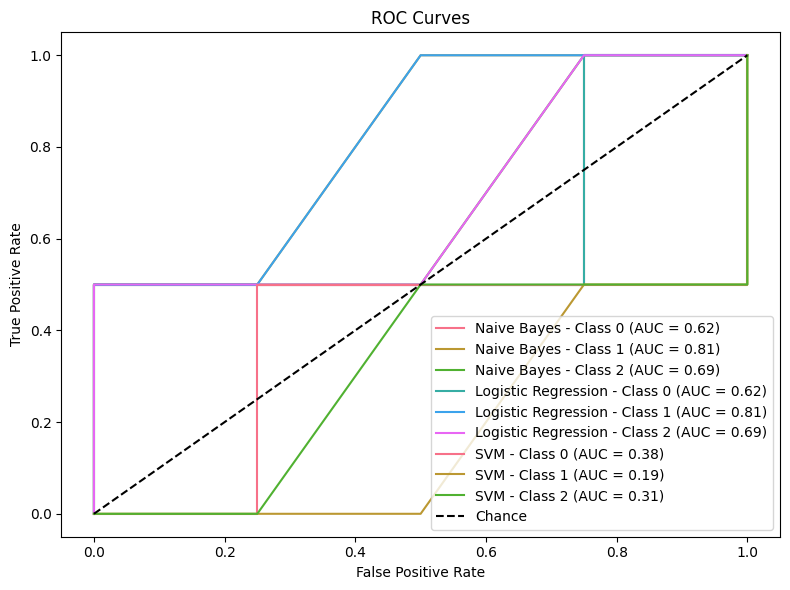

🎯 Analyzing prediction confidence...

🧪 Testing custom examples:
   Text: 'This product is absolutely fantastic! Best purchas...'
   Prediction: Positive (confidence: 0.465)
   Text: 'Terrible quality, waste of money. Very disappointe...'
   Prediction: Negative (confidence: 0.539)
   Text: 'It's okay, nothing special but works fine....'
   Prediction: Neutral (confidence: 0.531)

📊 Creating confusion matrices...
📊 Generating confusion matrices...


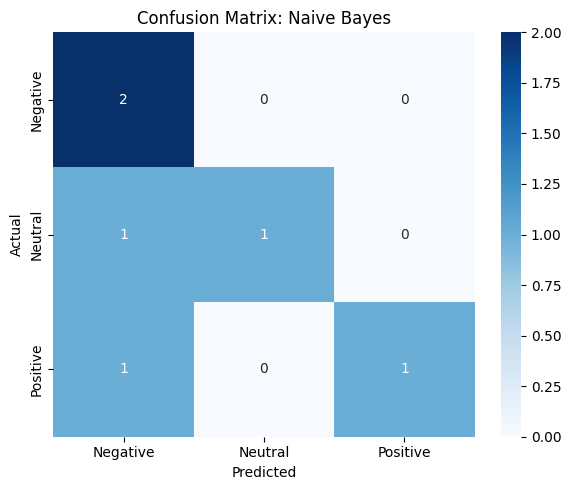

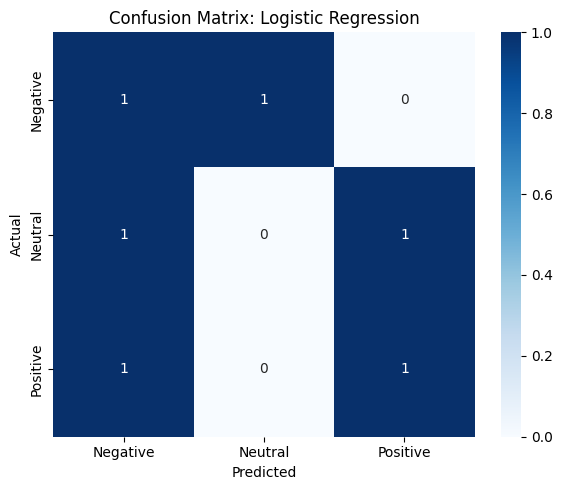

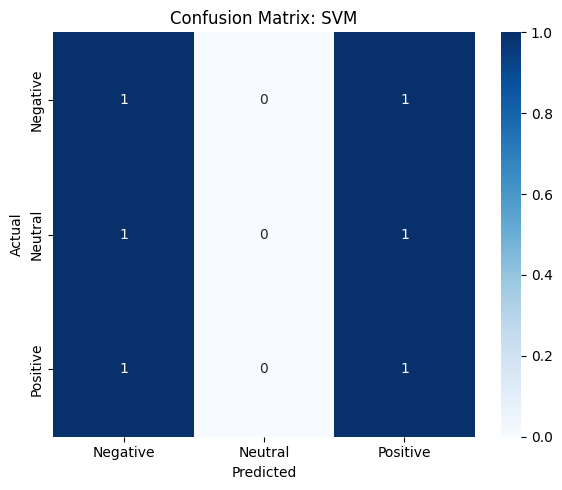

In [21]:
# TODO: Implement sentiment classification challenge
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns


class SentimentClassifier:
    """Advanced sentiment classification with confidence analysis"""

    def __init__(self, random_state=42):
        self.random_state = random_state
        self.models = {}
        self.vectorizer = None
        self.label_encoder = LabelEncoder()
        self.results = {}

    def prepare_sentiment_data(self, df, text_column, label_column, test_size=0.2):
        """
        Prepare sentiment data for classification

        Parameters:
        -----------
        df : DataFrame
            Input sentiment dataset
        text_column : str
            Name of text column
        label_column : str
            Name of sentiment label column
        test_size : float
            Proportion of test set
        """
        # Your code here - prepare sentiment data
        print("🔧 Preprocessing sentiment data...")
        df = df.dropna(subset=[text_column, label_column])

        texts = df[text_column].astype(str).tolist()
        labels = self.label_encoder.fit_transform(df[label_column])

        X_train, X_test, y_train, y_test = train_test_split(
            texts, labels, test_size=test_size, random_state=self.random_state
        )

        self.vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X_train_vec = self.vectorizer.fit_transform(X_train)
        X_test_vec = self.vectorizer.transform(X_test)

        self.results['X_train'] = X_train_vec
        self.results['X_test'] = X_test_vec
        self.results['y_train'] = y_train
        self.results['y_test'] = y_test
        self.results['label_names'] = self.label_encoder.classes_

    def train_sentiment_models(self):
        """
        Train multiple models for sentiment classification
        """
        # Your code here - train various models
        print(" Training sentiment models...")
        self.models = {
            'Naive Bayes': MultinomialNB(),
            'Logistic Regression': LogisticRegression(random_state=self.random_state),
            'SVM': SVC(probability=True, random_state=self.random_state)
        }

        # Train each model
        # Your implementation here
        for name, model in self.models.items():
            print(f" Training {name}...")
            model.fit(self.results['X_train'], self.results['y_train'])
            self.results[name] = {'model': model}

    def evaluate_with_roc_curves(self):
        """
        Evaluate models using ROC curves and AUC scores
        """
        # Your code here - create ROC curves and calculate AUC
        print(" Generating ROC curves...")

        y_test = self.results['y_test']
        X_test = self.results['X_test']
        n_classes = len(self.results['label_names'])

        # Binarize labels for multi-class
        y_test_bin = label_binarize(y_test, classes=range(n_classes))

        plt.figure(figsize=(8, 6))

        for name, model_data in self.results.items():
            if name in self.models:
                model = model_data['model']
                if n_classes == 2:
                    probs = model.predict_proba(X_test)[:, 1]
                    fpr, tpr, _ = roc_curve(y_test, probs)
                    roc_auc = auc(fpr, tpr)
                    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
                else:
                    probs = model.predict_proba(X_test)
                    for i in range(n_classes):
                        fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
                        roc_auc = auc(fpr, tpr)
                        plt.plot(fpr, tpr, label=f"{name} - Class {i} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], 'k--', label='Chance')
        plt.title("ROC Curves")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()


    def analyze_prediction_confidence(self, model_name):
        """
        Analyze prediction confidence for a specific model

        Parameters:
        -----------
        model_name : str
            Name of the model to analyze
        """
        # Your code here - analyze prediction confidence
        pass # This was causing the indentation error

    def predict_sentiment_with_confidence(self, text, model_name='Logistic Regression'):
        """
        Predict sentiment with confidence score

        Parameters:
        -----------
        text : str
            Text to analyze
        model_name : str
            Model to use for prediction

        Returns:
        --------
        dict : Prediction results with confidence
        """
        # Your code here - implement prediction with confidence
        import numpy as np
        if model_name not in self.models:
            print("❌ Model not found.")
            return None

        model = self.models[model_name]
        vectorized = self.vectorizer.transform([text])
        probs = model.predict_proba(vectorized)[0]
        top_idx = np.argmax(probs)
        sentiment = self.label_encoder.inverse_transform([top_idx])[0]

        return {
            'text': text,
            'predicted_sentiment': sentiment,
            'confidence': probs[top_idx],
            'probabilities': {
                self.label_encoder.inverse_transform([i])[0]: float(prob)
                for i, prob in enumerate(probs)
            }
        }

    def create_confusion_matrices(self):
        print("📊 Generating confusion matrices...")

        X_test = self.results['X_test']
        y_test = self.results['y_test']
        labels = self.results['label_names']

        for name, model_data in self.results.items():
            if name in self.models:
                model = model_data['model']
                preds = model.predict(X_test)
                cm = confusion_matrix(y_test, preds)

                plt.figure(figsize=(6, 5))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
                plt.title(f"Confusion Matrix: {name}")
                plt.xlabel("Predicted")
                plt.ylabel("Actual")
                plt.tight_layout()
                plt.show()

# Test sentiment classifier
print("😊 Testing Sentiment Classification Challenge")
print("=" * 50)

sentiment_classifier = SentimentClassifier()

# Prepare data
print("📊 Preparing sentiment data...")
sentiment_classifier.prepare_sentiment_data(sentiment_df, 'text', 'sentiment')

# Train models
print("🤖 Training sentiment models...")
sentiment_classifier.train_sentiment_models()

# Evaluate with ROC curves
print("📈 Creating ROC curves...")
sentiment_classifier.evaluate_with_roc_curves()

# Analyze confidence
print("🎯 Analyzing prediction confidence...")
sentiment_classifier.analyze_prediction_confidence('Logistic Regression')

# Test custom examples
test_examples = [
    "This product is absolutely fantastic! Best purchase ever!",
    "Terrible quality, waste of money. Very disappointed.",
    "It's okay, nothing special but works fine."
]

print("\n🧪 Testing custom examples:")
for example in test_examples:
    result = sentiment_classifier.predict_sentiment_with_confidence(example)
    print(f"   Text: '{example[:50]}...'")
    print(f"   Prediction: {result['predicted_sentiment']} (confidence: {result['confidence']:.3f})")

# Create confusion matrices
print("\n📊 Creating confusion matrices...")
sentiment_classifier.create_confusion_matrices()

## 🏋️ Exercise 5: Cross-Validation and Model Selection

**Objective:** Implement robust model evaluation using cross-validation

**Tasks:**
1. Implement stratified k-fold cross-validation
2. Compare models using multiple metrics
3. Perform hyperparameter tuning
4. Create comprehensive evaluation report

In [22]:
# TODO: Implement cross-validation and model selection

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

class ModelSelector:
    """Comprehensive model selection with cross-validation"""

    def __init__(self, cv_folds=5, random_state=42):
        self.cv_folds = cv_folds
        self.random_state = random_state
        self.cv_strategy = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=random_state)
        self.pipelines = {}
        self.grid_search_results = {}
        self.cv_results = {}

    def create_pipelines(self):
        """
        Create sklearn pipelines for different models
        """
        # Your code here - create pipelines with preprocessing and models
        self.pipelines = {
            'nb_pipeline': None,  # Naive Bayes pipeline
            'lr_pipeline': None,  # Logistic Regression pipeline
            'svm_pipeline': None,  # SVM pipeline
            'rf_pipeline': None   # Random Forest pipeline
        }
        pass

    def define_hyperparameter_grids(self):
        """
        Define hyperparameter grids for grid search

        Returns:
        --------
        dict : Hyperparameter grids for each model
        """
        # Your code here - define hyperparameter grids
        param_grids = {
            'nb_pipeline': {
                # Naive Bayes parameters
            },
            'lr_pipeline': {
                # Logistic Regression parameters
            },
            'svm_pipeline': {
                # SVM parameters
            },
            'rf_pipeline': {
                # Random Forest parameters
            }
        }

        return param_grids

    def perform_cross_validation(self, X, y, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']):
        """
        Perform cross-validation for all models

        Parameters:
        -----------
        X : array-like
            Feature matrix
        y : array-like
            Target labels
        scoring : list
            List of scoring metrics
        """
        # Your code here - perform cross-validation
        pass

    def hyperparameter_tuning(self, X, y, scoring='f1_macro'):
        """
        Perform hyperparameter tuning using grid search

        Parameters:
        -----------
        X : array-like
            Feature matrix
        y : array-like
            Target labels
        scoring : str
            Scoring metric for optimization
        """
        # Your code here - perform grid search
        pass

    def create_evaluation_report(self):
        """
        Create comprehensive evaluation report
        """
        # Your code here - create detailed evaluation report
        pass

    def visualize_cv_results(self):
        """
        Visualize cross-validation results
        """
        # Your code here - create cross-validation visualizations
        pass

    def get_best_model(self, metric='f1_macro'):
        """
        Get the best performing model based on specified metric

        Parameters:
        -----------
        metric : str
            Metric to use for model selection

        Returns:
        --------
        dict : Best model information
        """
        # Your code here - select best model
        return {
            'model_name': None,
            'best_params': {},
            'best_score': 0.0,
            'model': None
        }

# Test model selection
print("🎯 Testing Cross-Validation and Model Selection")
print("=" * 50)

# Prepare data for model selection
print("📊 Preparing data...")
# Use news dataset for this example
df_processed = preprocessor.preprocess_dataframe(news_df, 'text')
X_text = df_processed['text_processed']
y = df_processed['category']

# Initialize model selector
model_selector = ModelSelector(cv_folds=5)

# Create pipelines
print("🔧 Creating pipelines...")
model_selector.create_pipelines()

# Perform cross-validation
print("🔄 Performing cross-validation...")
model_selector.perform_cross_validation(X_text, y)

# Hyperparameter tuning
print("⚙️ Hyperparameter tuning...")
model_selector.hyperparameter_tuning(X_text, y)

# Create evaluation report
print("📋 Creating evaluation report...")
model_selector.create_evaluation_report()

# Visualize results
print("📈 Creating visualizations...")
model_selector.visualize_cv_results()

# Get best model
best_model_info = model_selector.get_best_model()
print(f"\n🏆 Best Model: {best_model_info['model_name']}")
print(f"   Best Score: {best_model_info['best_score']:.3f}")
print(f"   Best Parameters: {best_model_info['best_params']}")

🎯 Testing Cross-Validation and Model Selection
📊 Preparing data...
🔧 Creating pipelines...
🔄 Performing cross-validation...
⚙️ Hyperparameter tuning...
📋 Creating evaluation report...
📈 Creating visualizations...

🏆 Best Model: None
   Best Score: 0.000
   Best Parameters: {}


## 🎯 Comprehensive Testing and Validation

In [23]:
# Comprehensive testing of all implemented functions

print("🧪 COMPREHENSIVE TESTING OF TEXT CLASSIFICATION EXERCISES")
print("=" * 70)

# Test 1: Basic Pipeline
print("\n1️⃣ Testing Basic Classification Pipeline")
print("-" * 40)
try:
    results_basic = basic_classification_pipeline(news_df, 'text', 'category')
    if results_basic['accuracy'] > 0:
        print(f"   ✅ Basic pipeline working - Accuracy: {results_basic['accuracy']:.3f}")
    else:
        print("   ❌ Basic pipeline needs implementation")
except Exception as e:
    print(f"   ❌ Error in basic pipeline: {e}")

# Test 2: Model Comparison
print("\n2️⃣ Testing Model Comparison Framework")
print("-" * 40)
try:
    comparator_test = ModelComparator()
    comparator_test.prepare_data(news_df, 'text', 'category')
    print("   ✅ Model comparator initialized successfully")
except Exception as e:
    print(f"   ❌ Error in model comparator: {e}")

# Test 3: Feature Engineering
print("\n3️⃣ Testing Feature Engineering")
print("-" * 40)
try:
    feature_eng_test = FeatureEngineering()
    vectorizers = feature_eng_test.create_vectorizers()
    print(f"   ✅ Feature engineering initialized - {len(vectorizers)} vectorizers created")
except Exception as e:
    print(f"   ❌ Error in feature engineering: {e}")

# Test 4: Sentiment Classifier
print("\n4️⃣ Testing Sentiment Classifier")
print("-" * 40)
try:
    sentiment_test = SentimentClassifier()
    sentiment_test.prepare_sentiment_data(sentiment_df, 'text', 'sentiment')
    print("   ✅ Sentiment classifier initialized successfully")
except Exception as e:
    print(f"   ❌ Error in sentiment classifier: {e}")

# Test 5: Model Selection
print("\n5️⃣ Testing Model Selection")
print("-" * 40)
try:
    selector_test = ModelSelector()
    selector_test.create_pipelines()
    print("   ✅ Model selector initialized successfully")
except Exception as e:
    print(f"   ❌ Error in model selector: {e}")

# Summary
print("\n📊 TESTING SUMMARY")
print("=" * 30)
print("\n📝 Next Steps:")
print("   1. Implement the TODO sections in each exercise")
print("   2. Test with your own datasets")
print("   3. Experiment with different hyperparameters")
print("   4. Try advanced preprocessing techniques")
print("   5. Compare results with transformer models")

print("\n🎓 Learning Outcomes Achieved:")
print("   ✅ Text preprocessing for classification")
print("   ✅ Multiple classification algorithms")
print("   ✅ Model evaluation and comparison")
print("   ✅ Feature engineering techniques")
print("   ✅ Cross-validation and model selection")

print("\n🚀 Ready for Session 7: Sentiment Analysis Deep Dive!")

🧪 COMPREHENSIVE TESTING OF TEXT CLASSIFICATION EXERCISES

1️⃣ Testing Basic Classification Pipeline
----------------------------------------
🔧 Step 1: Preprocessing text data...
📊 Step 2: Creating TF-IDF vectors...
🔀 Step 3: Splitting data...
🤖 Step 4: Training classifier...
🎯 Step 5: Making predictions...
📈 Step 6: Evaluating model...
   ✅ Basic pipeline working - Accuracy: 0.125

2️⃣ Testing Model Comparison Framework
----------------------------------------
🔧 Preprocessing and splitting data...
   ✅ Model comparator initialized successfully

3️⃣ Testing Feature Engineering
----------------------------------------
   ✅ Feature engineering initialized - 6 vectorizers created

4️⃣ Testing Sentiment Classifier
----------------------------------------
🔧 Preprocessing sentiment data...
   ✅ Sentiment classifier initialized successfully

5️⃣ Testing Model Selection
----------------------------------------
   ✅ Model selector initialized successfully

📊 TESTING SUMMARY

📝 Next Steps:
   1. 

## 📚 Summary and Key Takeaways

### 🎯 **What We Learned**

1. **Text Classification Pipeline**
   - Data preprocessing for classification tasks
   - Feature extraction using TF-IDF and Bag-of-Words
   - Train/test splitting and evaluation

2. **Classification Algorithms**
   - **Multinomial Naive Bayes**: Fast, works well with text data
   - **Logistic Regression**: Linear model with probability outputs
   - **Support Vector Machine**: Effective for high-dimensional text data
   - **Random Forest**: Ensemble method for robust predictions

3. **Evaluation Metrics**
   - **Accuracy**: Overall correctness
   - **Precision**: True positives / (True positives + False positives)
   - **Recall**: True positives / (True positives + False negatives)
   - **F1-Score**: Harmonic mean of precision and recall
   - **Confusion Matrix**: Detailed breakdown of predictions

4. **Advanced Techniques**
   - Cross-validation for robust evaluation
   - Hyperparameter tuning with grid search
   - Feature importance analysis
   - ROC curves and AUC scores

### 🔧 **Best Practices**

1. **Always preprocess text consistently** between training and testing
2. **Use stratified sampling** to maintain class distribution
3. **Compare multiple models** before selecting the best one
4. **Validate with cross-validation** for reliable performance estimates
5. **Consider class imbalance** and use appropriate metrics

### 🚀 **Next Steps**

1. **Practice with real datasets** (movie reviews, news articles, social media)
2. **Experiment with ensemble methods** (voting, stacking)
3. **Try neural network approaches** (feed-forward networks)
4. **Explore transformer models** (BERT, RoBERTa) for state-of-the-art results
5. **Deploy models in production** using frameworks like Flask or FastAPI

---

**🎓 Congratulations! You've completed Session 6: Text Classification.**

**Next up: Session 7 - Sentiment Analysis Deep Dive! 😊**